In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test=pd.read_csv("C:/Users/manir/Downloads/test (3).csv")
train=pd.read_csv("C:/Users/manir/Downloads/train.csv")

In [3]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [4]:
test.shape

(127037, 11)

In [5]:
test.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


In [6]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [8]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [9]:
train.shape

(381109, 12)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


# 1.Check imbalence class

In [11]:
print(train.Response.value_counts())
train.Response.value_counts(normalize=True)

0    334399
1     46710
Name: Response, dtype: int64


0    0.877437
1    0.122563
Name: Response, dtype: float64

# 2.Null check

In [12]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

# 3.EDA & Cleaning

In [23]:
def cat_plot(col):
    plt.figure(figsize=(14,6))
    plt.title("Title for "+col)
    sns.countplot(train[col])
    plt.show()

C:\Users\manir\anaconda3\envs\mani\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


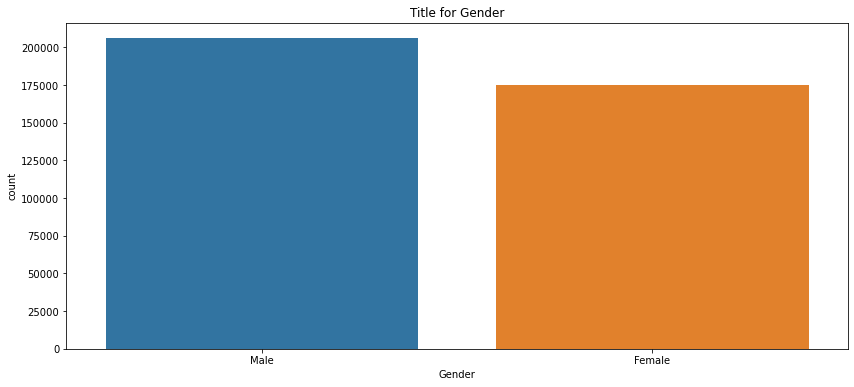

In [24]:
cat_plot("Gender")

C:\Users\manir\anaconda3\envs\mani\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


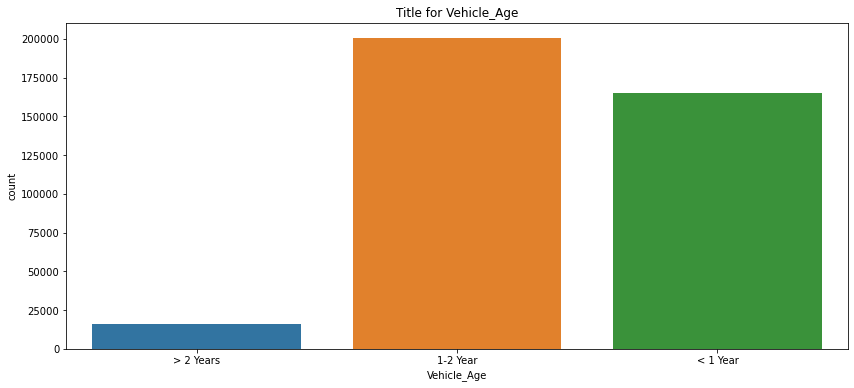

In [25]:
cat_plot("Vehicle_Age")

C:\Users\manir\anaconda3\envs\mani\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


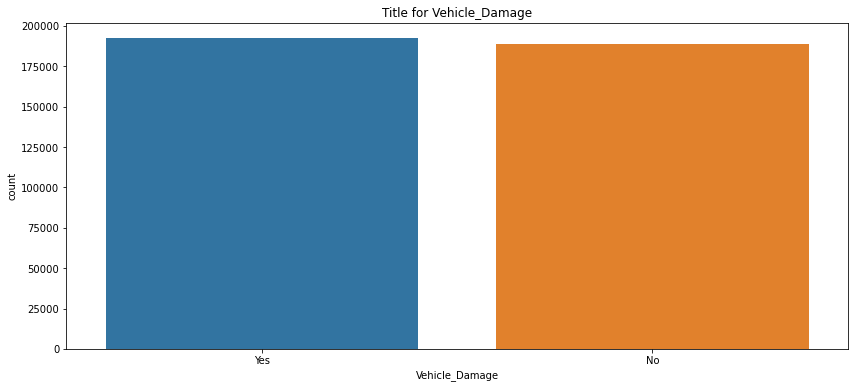

In [26]:
cat_plot("Vehicle_Damage")

Numerical Features:

In [37]:
def num_plot(col):
   
   for col in train.select_dtypes(include=np.number):
        print("Min :", train[col].min())
        print("Max :", train[col].max())
        print("Mean :", train[col].mean())
        plt.figure(figsize=(16,7))
        plt.title("Title for "+col)
        sns.distplot(train[col],color="g")
        plt.show()

Min : 1
Max : 381109
Mean : 190555.0


C:\Users\manir\anaconda3\envs\mani\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


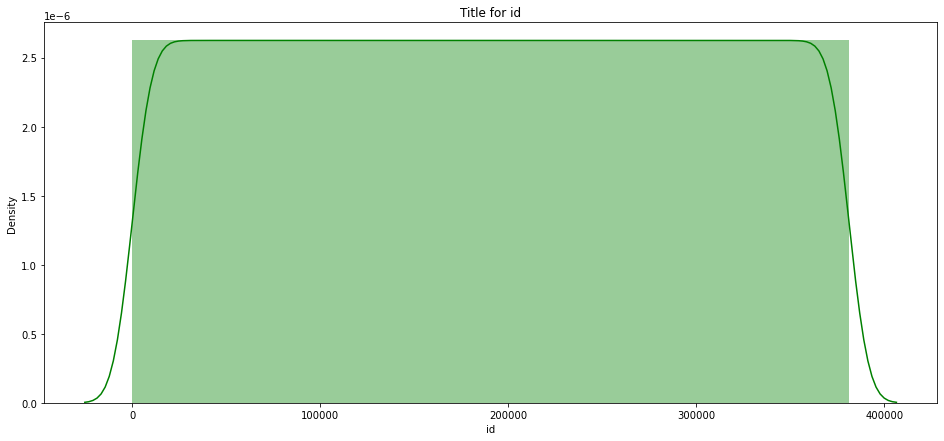

Min : 20
Max : 85
Mean : 38.822583565331705


C:\Users\manir\anaconda3\envs\mani\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


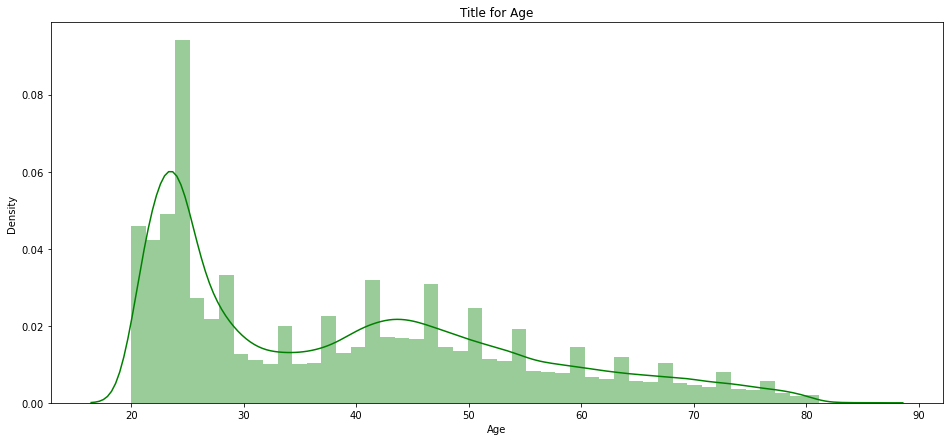

Min : 0
Max : 1
Mean : 0.9978693759528114


C:\Users\manir\anaconda3\envs\mani\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


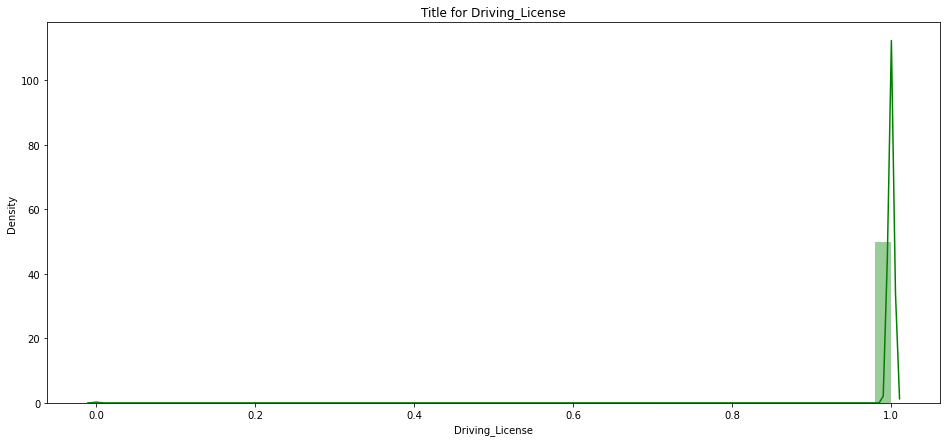

Min : 0.0
Max : 52.0
Mean : 26.388807401557035


C:\Users\manir\anaconda3\envs\mani\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


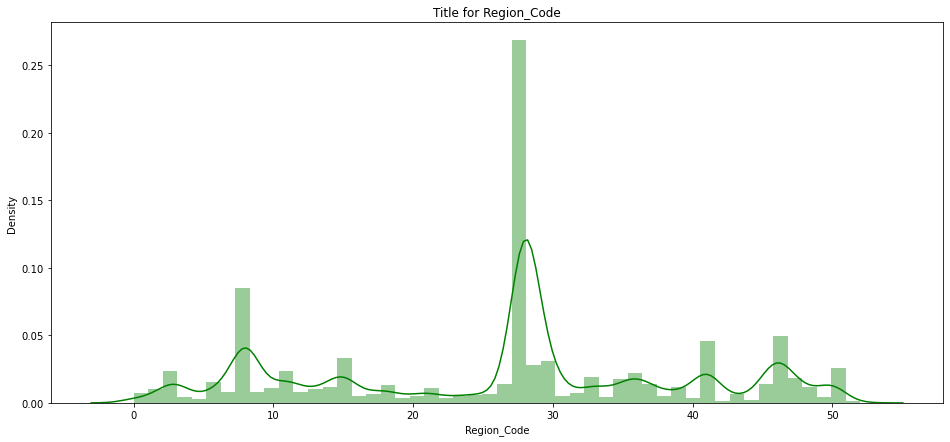

Min : 0
Max : 1
Mean : 0.4582101183650871


C:\Users\manir\anaconda3\envs\mani\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


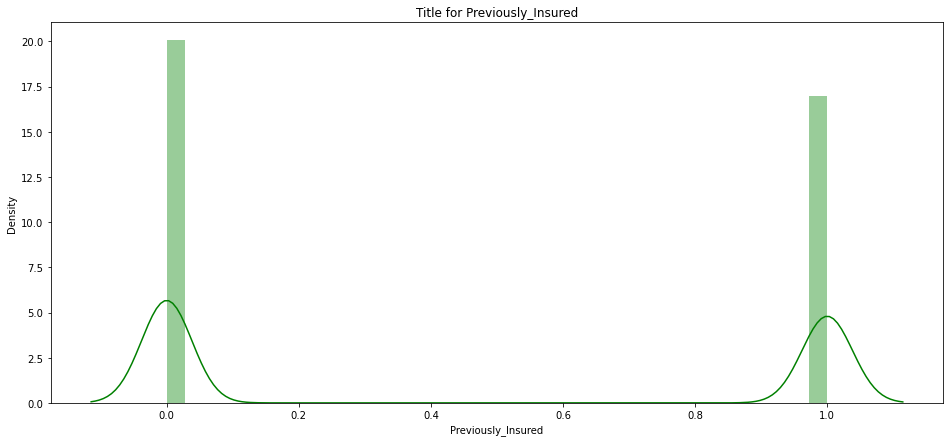

Min : 2630.0
Max : 540165.0
Mean : 30564.389581458323


C:\Users\manir\anaconda3\envs\mani\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


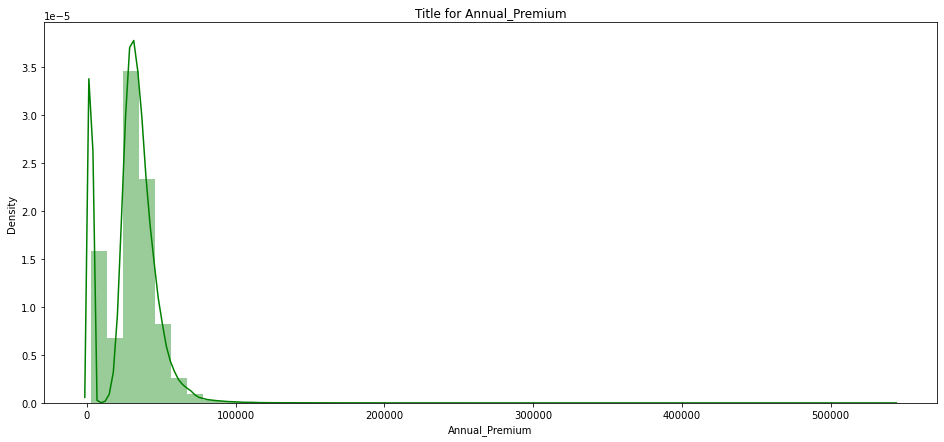

Min : 1.0
Max : 163.0
Mean : 112.03429465061177


C:\Users\manir\anaconda3\envs\mani\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


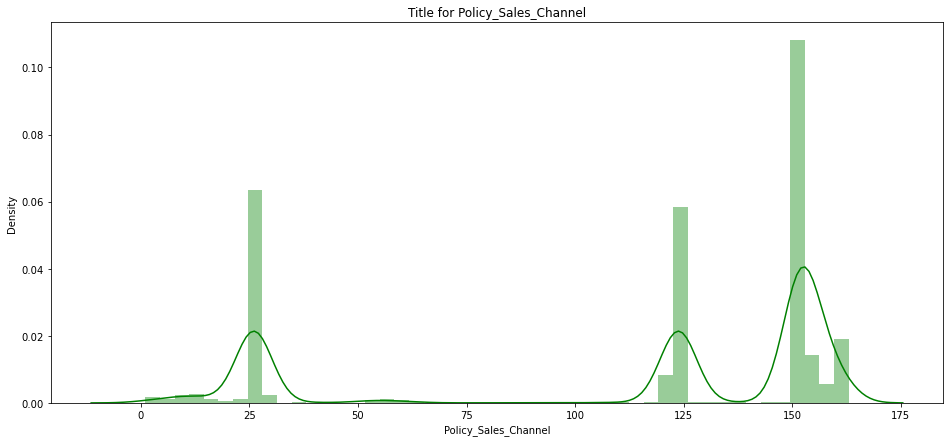

Min : 10
Max : 299
Mean : 154.34739667654136


C:\Users\manir\anaconda3\envs\mani\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


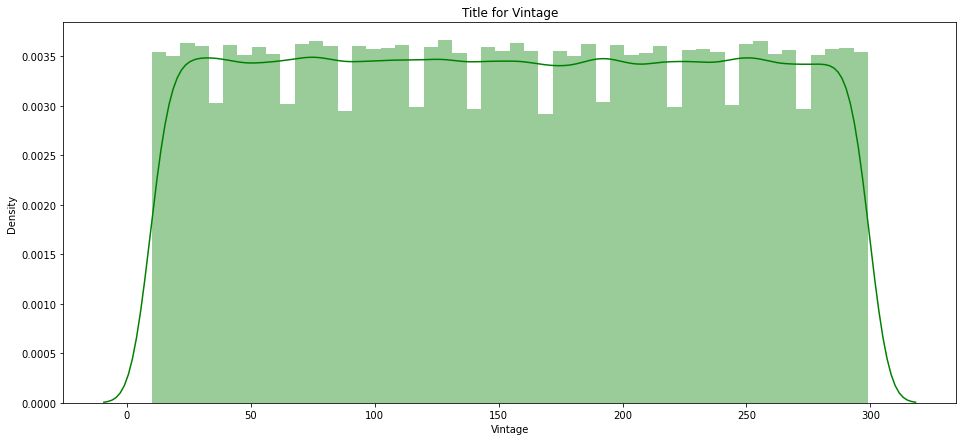

Min : 0
Max : 1
Mean : 0.12256336113815208


C:\Users\manir\anaconda3\envs\mani\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


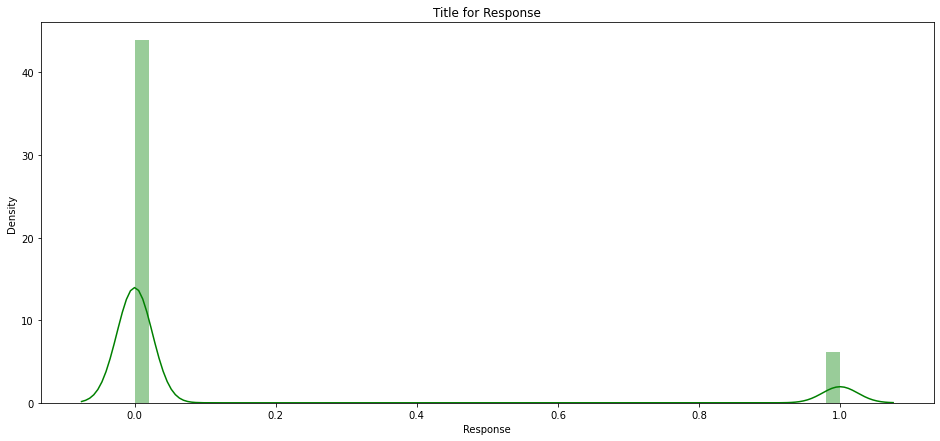

In [40]:
num_plot(id)

C:\Users\manir\anaconda3\envs\mani\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


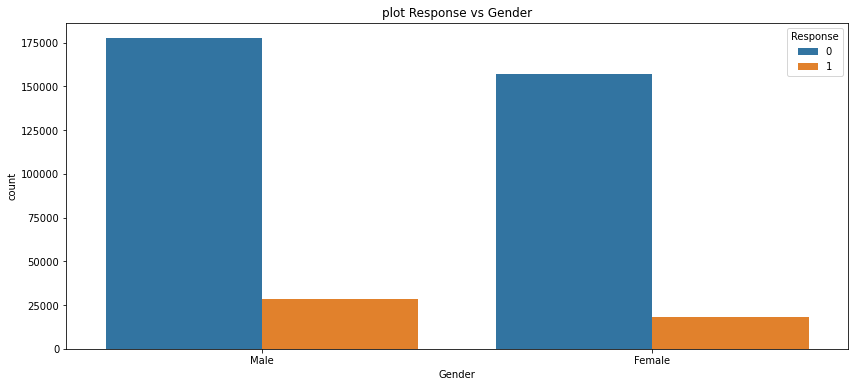

C:\Users\manir\anaconda3\envs\mani\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


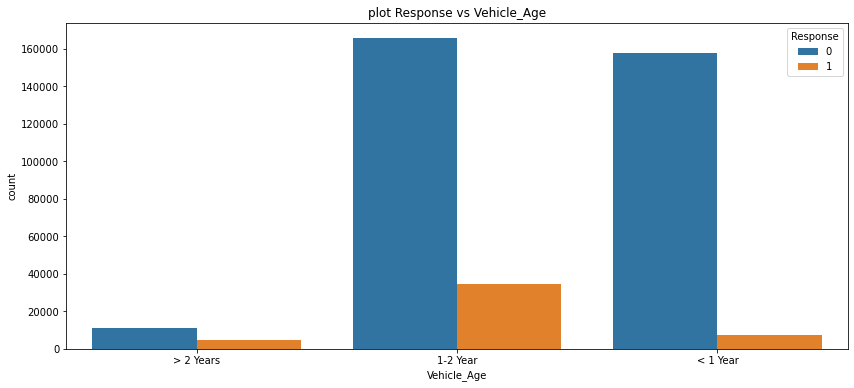

C:\Users\manir\anaconda3\envs\mani\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


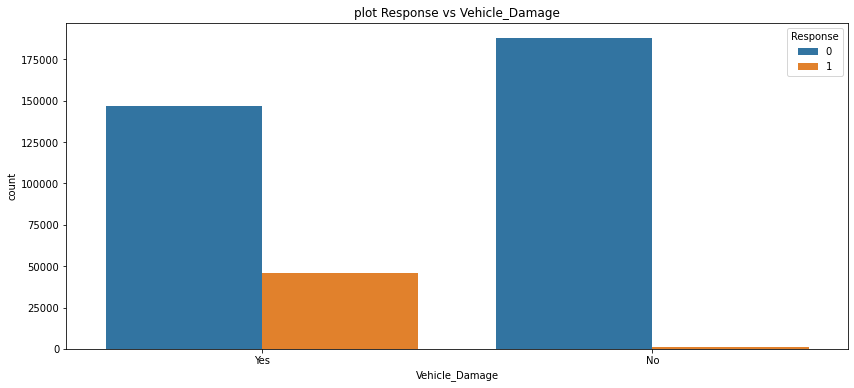

In [43]:
col=["Gender","Vehicle_Age","Vehicle_Damage"]

for i in col:
    plt.figure(figsize=(14,6))
    plt.title("plot Response vs " +i)
    sns.countplot(train[i],hue=train["Response"])
    plt.show()
    print

In [46]:
from sklearn.preprocessing import LabelBinarizer,LabelEncoder

In [47]:
cat_train=train.select_dtypes(exclude=np.number)

In [48]:
cat_train.columns

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [53]:
lb=LabelEncoder()
lb.fit_transform(np.array(train["Vehicle_Age"]).reshape(-1,1))

C:\Users\manir\anaconda3\envs\mani\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 2, ..., 1, 2, 0])

In [54]:
for i in  cat_train.columns:
    train[i]=lb.fit_transform(np.array(train[i]).reshape(-1,1))

In [55]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int32  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int32  
 7   Vehicle_Damage        381109 non-null  int32  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int32(3), int64(6)
memory usage: 30.5 MB


In [58]:
train["Response"].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [62]:
127037-46710

80327

In [61]:
no_train=train[train["Response"]==0]

In [63]:
yes_train=train[train["Response"]==1]

In [65]:
no_train.shape

(334399, 12)

In [66]:
yes_train.shape

(46710, 12)

In [67]:
train_80k=no_train.head(80327)

In [68]:
final=pd.concat([train_80k,yes_train])

In [69]:
final.to_csv("test.csv",index=False)

In [77]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score,cross_validate

In [78]:
test=pd.read_csv("test.csv")

In [79]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
1,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
2,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
3,6,0,24,1,33.0,0,1,1,2630.0,160.0,176,0
4,7,1,23,1,11.0,0,1,1,23367.0,152.0,249,0


In [80]:
test=shuffle(test)

In [81]:
test.shape

(127037, 12)

In [82]:
x=test.drop(["id","Response"],axis=1)
y=test["Response"]

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.2)

In [85]:
x_train.shape

(101629, 10)

In [86]:
y_train.shape

(101629,)

In [87]:
x_test.shape

(25408, 10)

In [88]:
y_test.shape

(25408,)

In [91]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

print("Train_accuracy: ",accuracy_score(y_train,lr.predict(x_train)))
print("Test_accuracy: ",accuracy_score(y_test,lr.predict(x_test)))

Train_accuracy:  0.7178167648997825
Test_accuracy:  0.7144600125944585


In [94]:
params= {
         
          "penalty":["l1","l2"],
           "C":[0.0001,0.001,0.01,0.1,0,10,100]
}

In [96]:
grid_lr=RandomizedSearchCV(lr,param_distributions=params,n_jobs=-1,cv=3,scoring="accuracy")
grid_lr.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 0, 10,
                                              100],
                                        'penalty': ['l1', 'l2']},
                   scoring='accuracy')

In [97]:
grid_lr.best_params_

{'penalty': 'l2', 'C': 0.1}

In [100]:
f_lr=LogisticRegression(penalty="l2",C=0.1)
f_lr.fit(x_train,y_train)

LogisticRegression(C=0.1)

In [101]:
y_pred=f_lr.predict(x_test)

In [102]:
print("Train_accuracy: ",accuracy_score(y_train,f_lr.predict(x_train)))
print("Train_accuracy: ",accuracy_score(y_test,y_pred))


Train_accuracy:  0.653494573399325
Train_accuracy:  0.6558957808564232


<function matplotlib.pyplot.show(close=None, block=None)>

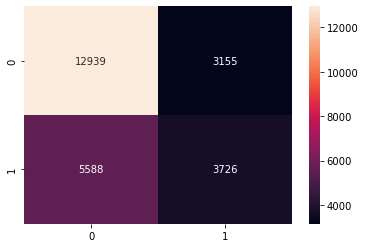

In [104]:
cm=confusion_matrix(y_test,y_pred)
cm=pd.DataFrame(data=cm,columns=[0,1],index=[0,1])
sns.heatmap(cm,annot=True,fmt="d")
plt.show

In [105]:
f1_score(y_test,y_pred)

0.46014201914171043

In [106]:
np.array(x_test)[1]

array([1.0000e+00, 5.0000e+01, 1.0000e+00, 3.6000e+01, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 3.4578e+04, 1.2400e+02, 1.9500e+02])

In [112]:
f_lr.predict(np.array(x_test)[1].reshape(1,-1))[0]

0

In [113]:
y_test[1]

KeyError: 1